# Basic Usage

In this notebook, we will show some typical use cases of the API  First, we import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cechmate as cm

## Rips Filtration

First, we show how to do a rips filtration (NOTE: The <a href = "https://github.com/scikit-tda/ripser.py">ripser.py</a> library is strongly recommended in this case, so this is mainly to show syntax)

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 1.59)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.779)


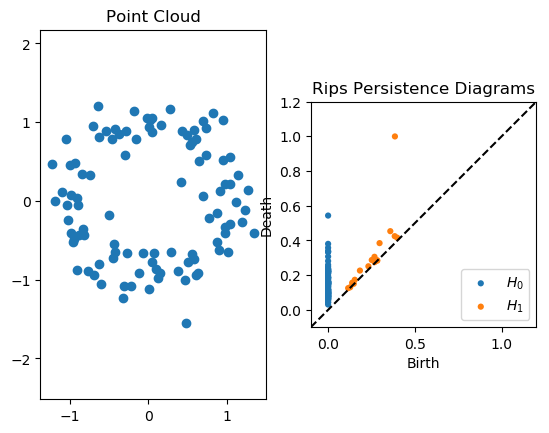

In [8]:
# Initialize a noisy circle
t = np.linspace(0, 2*np.pi, 100)
X = np.zeros((len(t), 2))
X[:, 0] = np.cos(t)
X[:, 1] = np.sin(t)
np.random.seed(10)
X += 0.2*np.random.randn(len(t), 2)

# Instantiate and build a rips filtration
rips = cm.Rips(max_dim=1) #Go up to 1D homology
filtration = rips.build(X)
dgmsrips = cm.phat_diagrams(filtration)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
cm.plot_dgms(dgmsrips)
plt.title("Rips Persistence Diagrams")
plt.show()

## Alpha Filtration

Now we will perform an alpha filtration on the exact same point cloud.

Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.00257)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.0583)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00463)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.000716)


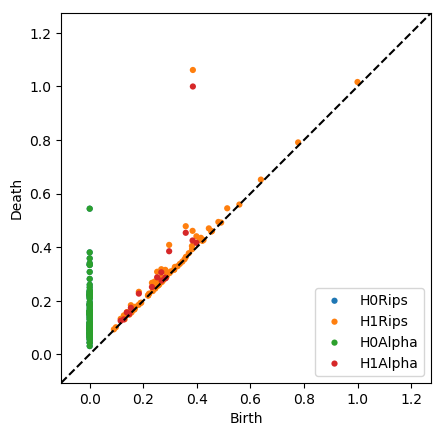

In [10]:
alpha = cm.Alpha()
filtration = alpha.build(2*X) # Alpha goes by radius instead of diameter
dgmsalpha = cm.phat_diagrams(filtration)
cm.plot_dgms(dgmsalpha + dgmsrips, labels = ['H0Rips', 'H1Rips', 'H0Alpha', 'H1Alpha'])
plt.show()

Note that the alpha filtration is substantially faster than the Rips filtration, and it is also more geometrically accurate.

Now let's try an example with a 400 points sampled from a 4-sphere in 5 dimensions.

Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.831)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 81.4)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 1.54)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.181)


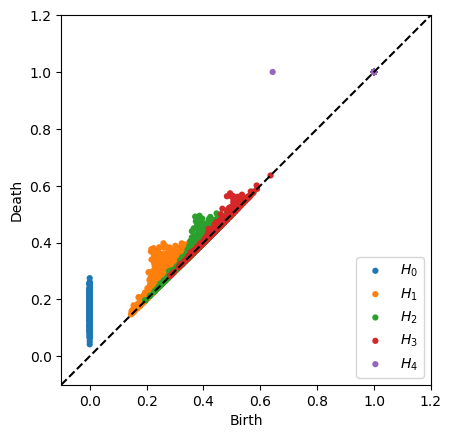

In [11]:
X = np.random.randn(400, 5)
X = X/np.sqrt(np.sum(X**2, 1)[:, None]) #Normalize points to the sphere
alpha = cm.Alpha()
filtration = alpha.build(X)
dgms = cm.phat_diagrams(filtration)
cm.plot_dgms(dgms)
plt.show()

As expected, the only nontrivial homology is in H4.  

Normally computing H4 with that number of points would grind Rips to a halt, but it runs in a reasonable amount of time with Alpha. The bottleneck with Alpha is constructing the filtration and computing many circumcenters. Note that computing the persistence pairs takes even less time than H1 for Rips with only 100 points shown above.

## Custom filtration

If you have a point cloud and a set of simplices with times at which they are added, you can compute the persistence diagrams associated to the custom filtration you've defined. For instance, assume we want to compute a filtration where 4 vertices enter at time 0 and the edges and triangles are added in the pattern below (note how the triangles are not added the moment all of their edges are added, unlike Rips):

<img src = "CustomExample.svg">

Then we can execute the following code:

In [14]:
filtration = [([0], 0), 
            ([1], 0), 
            ([2], 0), 
            ([3], 0), 
            ([0, 1], 1),
            ([0, 2], 1),
            ([1, 2], 2),
            ([0, 1, 2], 4),
            ([0, 3], 2),
            ([2, 3], 3),
            ([0, 2, 3], 6)]
#Compute persistence diagrams
dgms = cm.phat_diagrams(filtration, returnInfs = True)
print("H0:\n", dgms[0])
print("H1:\n", dgms[1])

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 7.75e-05)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 5.44e-05)
H0:
 [[ 0.  1.]
 [ 0.  1.]
 [ 0.  2.]
 [ 0. inf]]
H1:
 [[2 4]
 [3 6]]
